In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("../MNIST/MNIST_data/", one_hot=True)

Extracting ../MNIST/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST/MNIST_data/t10k-labels-idx1-ubyte.gz


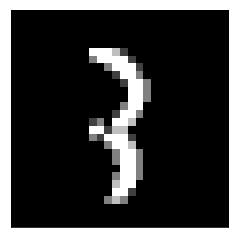

In [3]:
# get a random image from the MNIST data
id = np.random.randint(1000)
image = mnist.train.images[id:id+1]

# display the image
plt.tick_params( axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off' )
plt.imshow(image.reshape(28,28), cmap='gray')
# append '_r' to cmap for reversed color map

In [4]:
# we know that all the image are 28 by 28
# this is the input placeholder to provide data to our network
x = tf.placeholder(tf.float32, [None,28*28])

In [5]:
# create a session
sess = tf.InteractiveSession()

In [6]:
# Reshape the image to use in a convolutional network
xshaped = tf.reshape(x, [-1,28,28,1])

In [7]:
# this is reshaped image
out = sess.run(xshaped, feed_dict={x:image}) 
out.shape

(1, 28, 28, 1)

In [8]:
# how many features do we want to extract from the image
# each feature is an image with a filter applied to it
features = 5
# weights
W = tf.Variable( tf.truncated_normal([5,5,1,features], stddev=0.1))
# biases
b = tf.Variable( tf.constant(0.1, shape=[features]) )
# first 2 dimensions are patch size (5x5)
#   filters are applied to a section of the image (denoted by the patch size)
#   the section is then moved in the image by some value (denoted by a stride)
# next is number of input channels (we are only using 1 'greyscale')
#   this could also be the number of features coming from previous convolutional layer
# next is number of output channels or features

In [9]:
# initialize the variables
sess.run(tf.global_variables_initializer())

In [10]:
# create a convolutional layer
# stride denotes how patch (defined above) is moved in the image
# truncate the bottom of the output (<0 = 0) with relu (rectified linear unit)
conv1 = tf.nn.relu(tf.nn.conv2d(xshaped, W, strides=[1,1,1,1], padding='SAME') + b)

In [11]:
out = sess.run(conv1, feed_dict={x:image}) # this is convoluted image
print( out.min(), out.max() )
out.shape
# last dimension is the number of output channels in W
# (1,image width, image height, output channels / features)

0.0 0.97853


(1, 28, 28, 5)

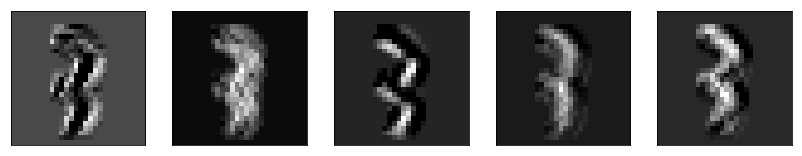

In [12]:
# Let see how all the features look like ...
# split the array to images with different features
img = np.dsplit(out[0], features)
width = out.shape[1]
height = out.shape[2]
# display the different features as images
plt.figure( figsize=( 14,10 ) )
for i in range( features ):
    plt.subplot(1, 5, i+1)
    plt.tick_params( axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off' )
    plt.imshow(img[i].reshape(width, height), cmap='gray')

In [13]:
# Create a pooling layer
#   a pooling layer is used to reduce the size of the inputs going forward in the network.
#   with a convolutional layer the size has already risen by a factor of feature count.
# this esssentially scales down all the images/features by a factor
scale_factor = 2
# add the pooling layer to the graph
pool1 = tf.nn.max_pool( conv1, ksize=[1,scale_factor,scale_factor,1], strides=[1,scale_factor,scale_factor,1], padding='SAME' )

In [14]:
# run the pooling layer
out = sess.run(pool1, feed_dict={x:image})
out.shape
# the middle 2 dimensions have reduced by half

(1, 14, 14, 5)

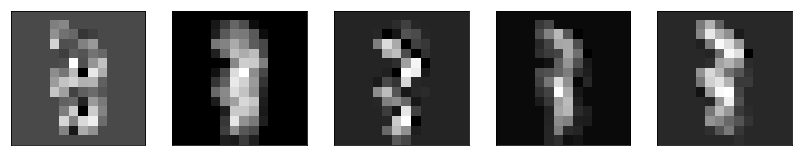

In [15]:
# split the array to images with different features
img = np.dsplit(out[0], features)
width = out.shape[1]
height = out.shape[2]
# display the different features as images
plt.figure( figsize=( 14,10 ) )
for i in range( features ):
    plt.subplot(1, 5, i+1)
    plt.tick_params( axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off' )
    plt.imshow(img[i].reshape(width, height), cmap='gray')

In [16]:
# Most of the graphs attach another convolution and pooling layer
# then the graph is attached to a fully connected layer